In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [114]:
beta1 = np.linspace(-1.0,1.0,1000)
beta2 = np.linspace(-1.0,1.0,1000)
beta1, beta2 = np.meshgrid(beta1, beta2)

In [115]:
reg_contours = {}
nums = np.linspace(0.5,2, 7)
for num in nums:
    reg_contours[f'L{num}'] = np.abs(beta1)**num + np.abs(beta2)**num

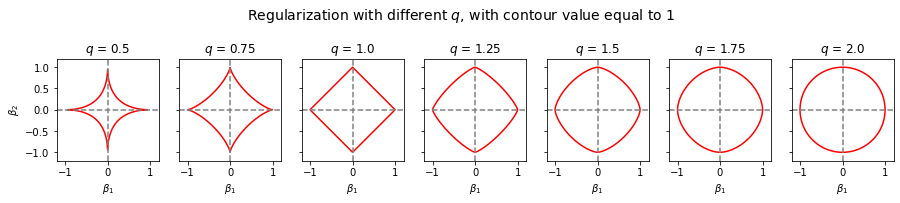

In [116]:
lim = 1.2
fig, ax = plt.subplots(1,7, figsize = (15,3), sharey = True)
for i in range(len(nums)):
    ax[i].contour(beta1, beta2, reg_contours[f'L{nums[i]}'], [1], colors = ['red'])
    ax[i].set_xlim(-lim,lim)
    ax[i].set_ylim(-lim,lim)
    ax[i].vlines(ymin = -lim, ymax = lim, x = 0, color = 'grey', linestyle = 'dashed')
    ax[i].hlines(xmin = -lim, xmax = lim, y = 0, color = 'grey', linestyle = 'dashed')
    ax[i].set_title(fr'$q$ = {nums[i]}')
    ax[i].set_aspect('equal')
    ax[i].set_xlabel(r'$\beta_1$')
    if i == 0:
        ax[i].set_ylabel(r'$\beta_2$')
fig.suptitle(r'Regularization with different $q$, with contour value equal to 1', fontsize = 14)
plt.show()

In [117]:
en_contours = {}
alphas = np.linspace(0,1, 5)
for alpha in alphas:
    en_contours[f'alpha{alpha}'] =  alpha*(np.abs(beta1)**2 + np.abs(beta2)**2) + (1-alpha)*(np.abs(beta1)+ np.abs(beta2))

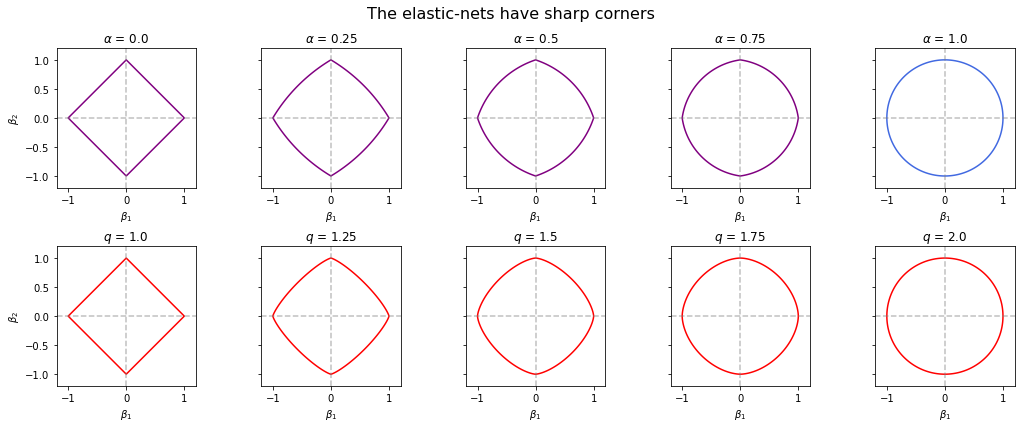

In [149]:
fig, ax = plt.subplots(2,5, figsize = (15,6), sharey = True)
for i in range(len(alphas)):
    if alphas[i] == 1:
        ax[0,i].contour(beta1, beta2, en_contours[f'alpha{alphas[i]}'], [1], colors = ['royalblue'])
    else:
        ax[0,i].contour(beta1, beta2, en_contours[f'alpha{alphas[i]}'], [1], colors = ['purple'])
    ax[0,i].set_xlim(-lim,lim)
    ax[0,i].set_ylim(-lim,lim)
    ax[0,i].vlines(ymin = -lim, ymax = lim, x = 0, color = 'grey', linestyle = 'dashed', alpha = 0.5)
    ax[0,i].hlines(xmin = -lim, xmax = lim, y = 0, color = 'grey', linestyle = 'dashed', alpha = 0.5)
    ax[0,i].set_title(fr'$\alpha$ = {alphas[i]}')
    ax[0,i].set_aspect('equal')
    ax[0,i].set_xlabel(r'$\beta_1$')
    if i == 0:
        ax[0,i].set_ylabel(r'$\beta_2$')
        
for i in range(2,len(nums)):
    if nums[i] != 1:
        ax[1,i-2].contour(beta1, beta2, reg_contours[f'L{nums[i]}'], [1], colors = ['red'])
    else:
        ax[1,i-2].contour(beta1, beta2, reg_contours[f'L{nums[i]}'], [1], colors = ['red'])
    ax[1,i-2].set_xlim(-lim,lim)
    ax[1,i-2].set_ylim(-lim,lim)
    ax[1,i-2].vlines(ymin = -lim, ymax = lim, x = 0, color = 'grey', linestyle = 'dashed', alpha = 0.5)
    ax[1,i-2].hlines(xmin = -lim, xmax = lim, y = 0, color = 'grey', linestyle = 'dashed', alpha = 0.5)
    ax[1,i-2].set_title(fr'$q$ = {nums[i]}')
    ax[1,i-2].set_aspect('equal')
    ax[1,i-2].set_xlabel(r'$\beta_1$')
    if i == 2:
        ax[1,i-2].set_ylabel(r'$\beta_2$')
fig.suptitle(r'The elastic-nets have sharp corners', fontsize = 16)
fig.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


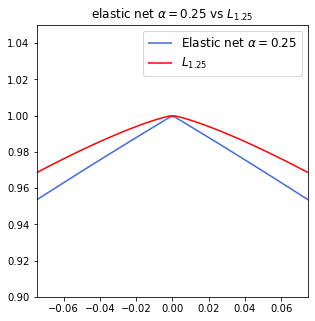

In [148]:
plt.figure(figsize = (5,5))
plt.axes().set_aspect('equal')
c1 = plt.contour(beta1, beta2, en_contours[f'alpha0.25'], [1], colors = ['royalblue'])
c2 = plt.contour(beta1, beta2, reg_contours[f'L1.25'], [1], colors = ['red'])
plt.xlim(-0.075, 0.075)
plt.ylim(0.9, 1.05)
plt.legend(loc = 'upper left')
l1,_ = c1.legend_elements()
l2,_ = c2.legend_elements()
plt.legend([l1[0], l2[0]], [r'Elastic net $\alpha = 0.25$', r'$L_{1.25}$'], fontsize = 12)
plt.title(r'elastic net $\alpha = 0.25$ vs $L_{1.25}$')
plt.show()